# Non-Linear Regression

Though linear regression is very good to solve many problems, it can not be used for all datasets. Linear regression models a linear relation between the dependent variable y and independent variable x. If the data shows a curvy trend, then linear regression will not produce very accurate results when compared to a non-linear regression because, as the name implies, linear regression presumes that the data is linear.

Non-linear regression is a method to model a non-linear realtionship between the dependent variable and a set of independent variables. Essentially any relationship that is not linear can be termed as non-linear, and is usually represented by the polynomial of $k$ degrees (maximum power of $x$),
    $ y = a x^3 + b x^2 + c x + d $

For a model to be considered non-linear, $\hat{y}$ must be a non-linear function of parameters $\theta$, not necessarily the features $x$. In other words, in non-linear regression, a model is non-linear by parameters. In contrast to linear regressions, we can not use ordinary least squares method to fit the data in non-linear regression, and in general, the estimation of the parameters in not easy. Non-linear functions can have elements like exponentials, logarithms, fractions, and others. For example: $ y = \log(x)$, or even more complicated such as  $y$ = $\log(a x^3 + b x^2 + c x + d)$

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

The dataset corresponds to China's GDP from 1960 to 2014

In [2]:
df = pd.read_csv('china_gdp.csv')

In [3]:
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


Let's plot the data to see what function can best capture the data

Text(0, 0.5, 'GDP')

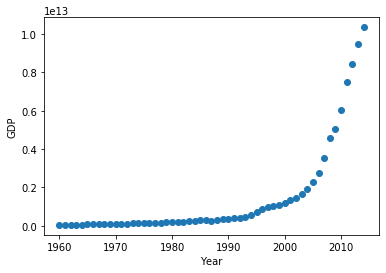

In [4]:
plt.plot(df['Year'], df['Value'], 'o')
plt.xlabel('Year')
plt.ylabel('GDP')

It looks like either logistic or exponential function. The growth starts off slow, then significantly grows from 2005, and finally decelerates slightly in the 2010s.

**Choosing a model :** From an initial look at the plot, we determine that the logistic function could be a good approximation, since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end as illustrated below:

Text(0.5, 1.0, 'Logistic function')

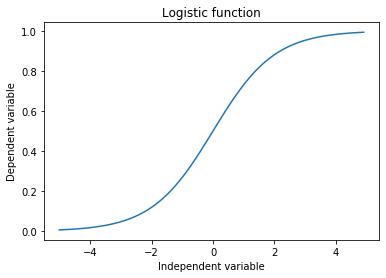

In [5]:
x_lgst = np.arange(-5.0, 5.0, 0.1)
y_lgst = 1.0/(1.0 + np.exp(-x_lgst))
plt.plot(x_lgst, y_lgst)
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.title('Logistic function')

The formula for the logistic function is the following:
    $$ \hat{y} = \frac1{1+e^{-\beta_1(X-\beta_2)}}$$
    $\beta_1$: controls the curve's steepness,
    $\beta_2$: slides the curve on the x-axis.

Now, let's build our regression model. Our task here is to find the best parameters for our model

In [6]:
def sigmoid(x, beta1, beta2):
    y = 1/(1 + np.exp(-beta1*(x-beta2)))
    return y

Let's first normalize our x and y

In [7]:
x_data, y_data = (df['Year'].values, df['Value'].values)
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

We can use __curve_fit__ which uses non-linear least squares to fit our data with sigmoid function. It finds the parameters values that minimize the MSE.

In [8]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)                                   # popt are our optimized parameters
print('Best fit parameters are beta1 = %f, beta2 = %f' % (popt[0], popt[1]))    # pcov : estimated covariance of popt

Best fit parameters are beta1 = 690.453018, beta2 = 0.997207


Let's plot our resulting regression model

Text(0, 0.5, 'GDP')

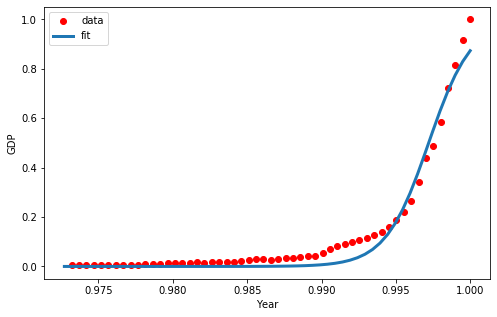

In [9]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
y = sigmoid(x, *popt)

plt.figure(figsize=(8,5))
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x, y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('GDP')